Đang lấy K = 40, 25, 30, 20

# **Hotel Recommendation System**

## **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import time
import datetime
import random
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from tqdm import tqdm
from bs4 import BeautifulSoup
from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import norm
from numpy import dot
from numpy import sqrt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

sns.set()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## **Read dataset**

In [ ]:
ratings = pd.read_csv('/content/dataset_final.csv')
ratings

,User_name,Location_hotel,Hotel_name,Rating,Comment,Service,Infrastructure,Sanitary,Location,Attitude
0,Nguyen V. C.,Phan Thiết,Khu nghỉ dưỡng Pandanus Phan Thiết,10.0,tôi đặt cho gia_đình của tôi đi nghe nói mọi t...,0,0,0,0,2
1,Nguyen T. A. T.,Phú Quốc,Vinpearl Resort & Spa Phú Quốc,8.5,khách_sạn có dịch_vụ tốt thủ_tục nhanh gọn nhâ...,1,0,0,0,2
2,Tran T. M. T.,Phan Thiết,Victoria Phan Thiết Beach Resort & Spa,9.0,victoria phan_thiết rất tốt tôi không_có_gì ph...,0,0,0,0,2
3,Dang T. D.,Đà Lạt,Khách Sạn LADALAT,6.0,khách_sạn hơi xa trung_tâm phòng_ốc tốt buffet...,1,1,0,1,1
4,Nguyen T. M. H.,Phan Thiết,Sea Links Beach Villas Phan Thiết,8.7,tốt khâu xếp_hàng từ bãi biển hơi có người sắp...,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...
2226,Do T. H.,Đà Nẵng,Khu nghỉ dưỡng Núi Thần Tài Ebisu Đà Nẵng,8.0,nhân_viên nhiệt_tình phòng thoáng rộng nhưng t...,1,1,0,0,2
2227,Nguyen T. T. H.,Huế,Hong Thien 1 Hotel,6.0,đồ ăn sáng không_ngon phòng có mùi khó_chịu và...,1,0,1,0,0
2228,Phan T. L.,Phan Thiết,Khu nghỉ dưỡng Muine Bay Phan Thiết,10.0,nói_chung là chuyến đi rất tốt tôi không_có_gì...,1,0,0,0,2
2229,Nguyen T. M. C.,Phan Thiết,Khu nghỉ dưỡng Pandanus Phan Thiết,9.0,dịch_vụ ăn_uống và phòng_ốc của khách_sạn đều ...,1,1,0,0,2


<Figure size 1200x800 with 0 Axes>

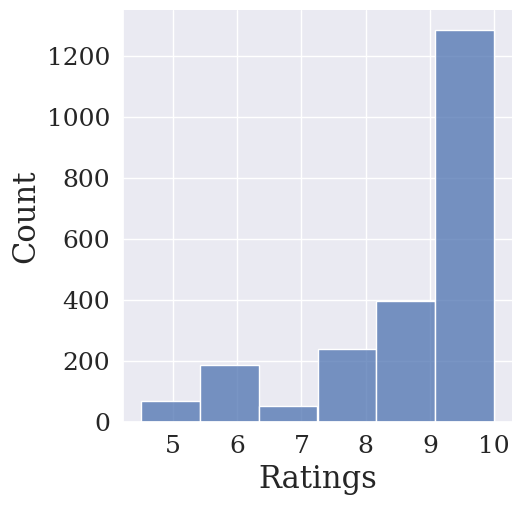

In [ ]:
plt.figure(figsize=(12, 8))
sns.displot(x=ratings["Rating"],bins=6)

plt.xlabel('Ratings', fontsize=22, fontfamily='serif')
plt.ylabel('Count', fontsize=22, fontfamily='serif')

plt.xticks(fontsize=18, fontfamily='serif')
plt.yticks(fontsize=18, fontfamily='serif')

plt.show()

## **Preprocess Data**

In [ ]:
ratings = ratings.loc[:,['User_name','Hotel_name','Service',	'Infrastructure',	'Sanitary',	'Location',	'Attitude', 'Rating']]
ratings

,User_name,Hotel_name,Service,Infrastructure,Sanitary,Location,Attitude,Rating
0,Nguyen V. C.,Khu nghỉ dưỡng Pandanus Phan Thiết,0,0,0,0,2,10.0
1,Nguyen T. A. T.,Vinpearl Resort & Spa Phú Quốc,1,0,0,0,2,8.5
2,Tran T. M. T.,Victoria Phan Thiết Beach Resort & Spa,0,0,0,0,2,9.0
3,Dang T. D.,Khách Sạn LADALAT,1,1,0,1,1,6.0
4,Nguyen T. M. H.,Sea Links Beach Villas Phan Thiết,0,0,0,0,2,8.7
...,...,...,...,...,...,...,...,...
2226,Do T. H.,Khu nghỉ dưỡng Núi Thần Tài Ebisu Đà Nẵng,1,1,0,0,2,8.0
2227,Nguyen T. T. H.,Hong Thien 1 Hotel,1,0,1,0,0,6.0
2228,Phan T. L.,Khu nghỉ dưỡng Muine Bay Phan Thiết,1,0,0,0,2,10.0
2229,Nguyen T. M. C.,Khu nghỉ dưỡng Pandanus Phan Thiết,1,1,0,0,2,9.0


In [ ]:
# tokenize User_name, Hotel_name
user_ids = ratings["User_name"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}

hotel_ids = ratings["Hotel_name"].unique().tolist()
hotel2hotel_encoded = {x: i for i, x in enumerate(hotel_ids)}
hotel_encoded2hotel = {i: x for i, x in enumerate(hotel_ids)}

ratings["UserID"] = ratings["User_name"].map(user2user_encoded)
ratings["HotelID"] = ratings["Hotel_name"].map(hotel2hotel_encoded)

num_users = len(user2user_encoded)
num_hotels = len(hotel2hotel_encoded)
ratings["Rating"] = ratings["Rating"].values.astype(np.float32)

min_rating = min(ratings["Rating"])
max_rating = max(ratings["Rating"])

print("Number of users: {}, Number of hotels: {}, Min rating: {}, Max rating: {}".format(num_users, num_hotels, min_rating, max_rating))

Number of users: 368, Number of hotels: 137, Min rating: 4.5, Max rating: 10.0


In [ ]:
ratings

,User_name,Hotel_name,Service,Infrastructure,Sanitary,Location,Attitude,Rating,UserID,HotelID
0,Nguyen V. C.,Khu nghỉ dưỡng Pandanus Phan Thiết,0,0,0,0,2,10.0,0,0
1,Nguyen T. A. T.,Vinpearl Resort & Spa Phú Quốc,1,0,0,0,2,8.5,1,1
2,Tran T. M. T.,Victoria Phan Thiết Beach Resort & Spa,0,0,0,0,2,9.0,2,2
3,Dang T. D.,Khách Sạn LADALAT,1,1,0,1,1,6.0,3,3
4,Nguyen T. M. H.,Sea Links Beach Villas Phan Thiết,0,0,0,0,2,8.7,4,4
...,...,...,...,...,...,...,...,...,...,...
2226,Do T. H.,Khu nghỉ dưỡng Núi Thần Tài Ebisu Đà Nẵng,1,1,0,0,2,8.0,255,47
2227,Nguyen T. T. H.,Hong Thien 1 Hotel,1,0,1,0,0,6.0,181,54
2228,Phan T. L.,Khu nghỉ dưỡng Muine Bay Phan Thiết,1,0,0,0,2,10.0,263,29
2229,Nguyen T. M. C.,Khu nghỉ dưỡng Pandanus Phan Thiết,1,1,0,0,2,9.0,159,0


In [ ]:
# Normalize rating vào khoảng [0, 1]
ratings["Rating"] = ratings["Rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

In [ ]:
from sklearn.model_selection import train_test_split

ratings_item, ratings_test_item, _, _ = train_test_split(ratings,ratings,
                                                    random_state=42, test_size=0.2)
ratings_user = ratings_item
ratings_test_user = ratings_test_item

In [ ]:
ratings_user

,User_name,Hotel_name,Service,Infrastructure,Sanitary,Location,Attitude,Rating,UserID,HotelID
1988,Le Q. H.,Khu nghỉ dưỡng Melia Đà Nẵng Beach,0,0,0,0,2,1.000000,168,71
1996,Nguyen T. H. L.,Khu nghỉ dưỡng Vinpearl Nha Trang,1,1,0,0,2,0.454545,363,57
1581,Thu L.,Ma Coeur Boutique Hotel,1,1,1,0,2,0.945455,302,56
1904,Nguyen T. M. H.,Khách sạn Mường Thanh Luxury Khánh Hòa,1,1,1,0,2,0.945455,4,67
1426,Do T. T.,Khu nghỉ dưỡng Fusion Phú Quốc,1,0,0,0,2,1.000000,248,83
...,...,...,...,...,...,...,...,...,...,...
1638,Nguyen V. T.,Vinpearl Resort & Spa Phú Quốc,1,1,1,0,2,0.636364,63,1
1095,Nguyen T. M. H.,Khách sạn Royal Vũng Tàu,1,0,0,1,2,0.727273,4,55
1130,Mai T. N.,Khu nghỉ dưỡng Crown Retreat Quy Nhơn,1,0,0,1,2,1.000000,216,65
1294,Nguyen M. P.,Khu nghỉ dưỡng Pandanus Phan Thiết,1,0,0,0,2,1.000000,338,0


In [ ]:
ratings_test_user

,User_name,Hotel_name,Service,Infrastructure,Sanitary,Location,Attitude,Rating,UserID,HotelID
1547,Vu T. T.,Khách sạn Fusion Suites Vũng Tàu,1,0,0,0,0,0.636364,20,92
1411,Pham T.,Khu nghỉ dưỡng Ana Mandara Villas Dalat Resort...,1,0,0,0,2,0.636364,300,36
480,Nguyen T. H. H.,Meliã Vinpearl Đà Nẵng Riverfront,1,1,0,0,2,1.000000,221,28
617,Nguyen T. L.,Khu nghỉ dưỡng Fusion Phú Quốc,1,1,0,0,2,1.000000,193,83
1489,Nguyen Q. T.,Khu nghỉ dưỡng Seava Hồ Tràm,1,0,0,0,0,1.000000,249,81
...,...,...,...,...,...,...,...,...,...,...
1040,Vo M. T.,Khu nghỉ dưỡng Fusion Phú Quốc,1,0,0,0,2,0.636364,87,83
1268,Tran T. V.,Muong Thanh Quy Nhon Hotel,1,0,0,0,2,0.945455,57,102
464,Tran T. V.,Khu nghỉ dưỡng Ana Mandara Villas Dalat Resort...,1,1,0,0,1,0.636364,57,36
1669,Vu T. H.,Seahorse Resort & Spa Phan Thiết,1,1,0,0,0,0.636364,33,8


## **Collaborative Filtering**

### **Based on User**

#### **Modeling**

In [ ]:
# Chuyển bảng ratings sang dataframe với các cột là "UserID" và các hàng là "HotelID" (*)
ratings_user_df = ratings_user.pivot_table(index='HotelID', columns='UserID')['Rating'].fillna(0)
ratings_user_df

<ipython-input-11-6f3911674d33>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  ratings_user_df = ratings_user.pivot_table(index='HotelID', columns='UserID')['Rating'].fillna(0)


UserID,0,1,2,3,4,5,6,7,8,9,...,356,357,358,359,360,362,363,364,365,366
HotelID,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.000000,0.000000,0.636364,0.000000,0.0,0.636364,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.757576,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.818182,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0
3,0.0,0.000000,0.000000,0.272727,0.000000,0.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.763636,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.818182,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
132,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
133,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
# Lấy ra rating của 1 user cho 1 hotel
def get_rating_user(userid, hotelid):
  return (ratings_user.loc[(ratings_user.UserID==userid) & (ratings_user.HotelID==hotelid), 'Rating'].iloc[0])

In [ ]:
get_rating_user(273, 69)

0.8909090215509589

In [ ]:
def pearson_correlation_score_user(user1, user2):
  both_rating_count = [] # Danh sách các hotel được đánh giá chung bởi user1 và user2
  list_hotel_user1 = ratings_user.loc[(ratings_user.UserID == user1), 'HotelID'].to_list()
  list_hotel_user2 = ratings_user.loc[(ratings_user.UserID == user2), 'HotelID'].to_list()

  for hotelid in list_hotel_user1:
    if hotelid in list_hotel_user2:
      both_rating_count.append(hotelid)

  if len(both_rating_count)==0:
    return 0

  avg_rating_1 = np.average([get_rating_user(user1, i) for i in both_rating_count]) # rating trung bình user1
  avg_rating_2 = np.average([get_rating_user(user2, i) for i in both_rating_count]) # rating trung bình user2

  TuSo = sum([(get_rating_user(user1, i) - avg_rating_1)*(get_rating_user(user2, i) - avg_rating_2) for i in both_rating_count])
  MauSo = sqrt(sum((get_rating_user(user1, i) - avg_rating_1)**2 for i in both_rating_count))*sqrt(sum((get_rating_user(user2, i) - avg_rating_2)**2 for i in both_rating_count))

  if MauSo==0:
    return 0

  return TuSo/MauSo

In [ ]:
pearson_correlation_score_user(273, 273)

1.0

In [ ]:
def distance_similarity_score_user(user1, user2):
  both_rating_count = 0
  list_hotel_user1 = ratings_user.loc[(ratings_user.UserID == user1), 'HotelID'].tolist()
  list_hotel_user2 = ratings_user.loc[(ratings_user.UserID == user2), 'HotelID'].tolist()

  for hotelid in list_hotel_user1:
    if hotelid in list_hotel_user2:
      both_rating_count += 1

  if both_rating_count == 0:
    return 0

  rating1 = []
  rating2 = []

  for hotelid in list_hotel_user1:
    if hotelid in list_hotel_user2:
      rating1.append(get_rating_user(user1, hotelid))
      rating2.append(get_rating_user(user2, hotelid))

  # print(rating1)
  # print(rating2)

  return dot(rating1, rating2)/(norm(rating1)*norm(rating2))

In [ ]:
print('Distance based similarity between user ids X & u1: {}'.format(distance_similarity_score_user(273, 211)))
print('Distance based similarity between user ids X & u2: {}'.format(distance_similarity_score_user(273, 100)))
print('Distance based similarity between user ids X & u3: {}'.format(distance_similarity_score_user(273, 275)))

Distance based similarity between user ids X & u1: 1.0
Distance based similarity between user ids X & u2: 0.8834702482280343
Distance based similarity between user ids X & u3: 0


In [ ]:
# Danh sách các khách sạn đã rating bởi người dùng
def get_hotelids(userid):
  return (ratings_user.loc[(ratings_user.UserID==userid), 'HotelID'].tolist())

In [ ]:
print(get_hotelids(59))

[92, 0, 31, 83, 75, 94, 2, 2, 3, 53, 2, 13, 107, 1, 57, 51, 2, 64, 3, 11, 93, 61, 29, 62, 2, 47, 3, 67, 22, 45, 64, 8, 61, 39, 99, 0, 41, 64, 6, 9, 0, 49, 56, 43, 41, 88, 19, 47, 64, 36, 67, 90, 3, 36, 0, 51, 83, 48, 2]


In [ ]:
# Lấy ra tên của một khách sạn
def get_name_hotel(hotelid):
  return (ratings_user.loc[(ratings_user.HotelID==hotelid), 'Hotel_name'].iloc[0])

In [ ]:
get_name_hotel(50)

'Khách sạn Mường Thanh Luxury Quảng Ninh'

In [ ]:
def most_similar_user(user1, number_of_user, similarity_name):
  userid = ratings_user.UserID.unique().tolist()
  # print(len(userid))

  if similarity_name == 'pearson':
    similarity_score =  [(pearson_correlation_score_user(user1, user_i), user_i) for user_i in userid if user_i != user1]

  if similarity_name == 'cosine':
    similarity_score =  [(distance_similarity_score_user(user1, user_i), user_i) for user_i in userid if user_i != user1]

  similarity_score.sort() # Tăng dần
  similarity_score.reverse() # Giảm dần

  return similarity_score[:number_of_user] # Có thể thay đổi số lượng lân cận

In [ ]:
%%time
list_user_popular = most_similar_user(1308, 10, "pearson")
list_user_popular

CPU times: user 187 ms, sys: 1.89 ms, total: 189 ms
Wall time: 211 ms


[(0, 366),
 (0, 365),
 (0, 364),
 (0, 363),
 (0, 362),
 (0, 360),
 (0, 359),
 (0, 358),
 (0, 357),
 (0, 356)]

In [ ]:
# Lấy ra danh sách khuyến nghị từ top populars
def get_recommendation_based_on_user(userid, number_of_user, similarity_name):#topN,
  total = {}
  sum_similarity = {}
  list_user_popular = most_similar_user(userid, number_of_user, similarity_name)

  # Iterating over subset of user ids.
  for similarityName, user in list_user_popular:
    score = similarityName
    hotelids = get_hotelids(user)

    for hotelid in hotelids: # -> Danh sách các id hotel đã xem bởi user khác và khởi tạo giá trị = 0
      if hotelid not in get_hotelids(userid):
        total[hotelid] = 0
        sum_similarity[hotelid] = 0

    for hotelid in hotelids: #-> Danh sách các id hotel đã xem bởi user khác
      if hotelid not in get_hotelids(userid):
        total[hotelid] += get_rating_user(user, hotelid)*score
        sum_similarity[hotelid] += score

  # Normalizing ratings
  ranking = []
  for userid,tot in total.items():
    if sum_similarity[userid] == 0:
      ranking.append((0,userid))
    else:
      rating = tot/(sum_similarity[userid])
      ranking.append((rating,userid))
  # ranking = [(tot/sum_similarity[hotelid], hotelid) for hotelid, tot in total.items()]
  ranking.sort()
  ranking.reverse()

  recommendations = [(get_name_hotel(hotelid), hotelid, score) for score, hotelid in ranking]

  return recommendations#[:topN]

In [ ]:
%%time
get_recommendation_based_on_user(1187, 10, 'pearson')

CPU times: user 179 ms, sys: 2.17 ms, total: 182 ms
Wall time: 184 ms


[('Hai Yen Family Resort', 128, 0),
 ('Khách sạn Mường Thanh Luxury Sài Gòn', 123, 0),
 ('Thanh Binh Central Hotel', 107, 0),
 ('FLC Luxury Resort Quy Nhon', 97, 0),
 ("Khách sạn D'Lecia Ha Long", 96, 0),
 ('Vinpearl Condotel Beachfront Nha Trang', 90, 0),
 ('The Bay - Ha Long Homestay', 87, 0),
 ('Melissa Hotel Nha Trang', 75, 0),
 ('Khu nghỉ dưỡng Vinpearl Nha Trang', 57, 0),
 ('Khu Nghỉ Dưỡng Best Western Premier Sonasea Phú Quốc', 49, 0),
 ('Vinpearl Discovery Wonderworld Phú Quốc', 48, 0),
 ('City Bay Palace Hotel', 45, 0),
 ('Khu nghỉ dưỡng Ana Mandara Villas Dalat Resort and Spa', 36, 0),
 ('Phan Thiet Ocean Dunes Resort', 35, 0),
 ('Rex Hotel and Apartment', 33, 0),
 ('JW Marriott Phu Quoc Emerald Bay Resort & Spa', 19, 0),
 ('Khách sạn Senkotel Nha Trang', 15, 0),
 ('Seahorse Resort & Spa Phan Thiết', 8, 0),
 ('Sea Links Beach Villas Phan Thiết', 4, 0),
 ('Victoria Phan Thiết Beach Resort & Spa', 2, 0)]

In [ ]:
%%time
get_recommendation_based_on_user(1187, 10, 'cosine')

CPU times: user 195 ms, sys: 1.87 ms, total: 197 ms
Wall time: 216 ms


[('Hai Yen Family Resort', 128, 0),
 ('Khách sạn Mường Thanh Luxury Sài Gòn', 123, 0),
 ('Thanh Binh Central Hotel', 107, 0),
 ('FLC Luxury Resort Quy Nhon', 97, 0),
 ("Khách sạn D'Lecia Ha Long", 96, 0),
 ('Vinpearl Condotel Beachfront Nha Trang', 90, 0),
 ('The Bay - Ha Long Homestay', 87, 0),
 ('Melissa Hotel Nha Trang', 75, 0),
 ('Khu nghỉ dưỡng Vinpearl Nha Trang', 57, 0),
 ('Khu Nghỉ Dưỡng Best Western Premier Sonasea Phú Quốc', 49, 0),
 ('Vinpearl Discovery Wonderworld Phú Quốc', 48, 0),
 ('City Bay Palace Hotel', 45, 0),
 ('Khu nghỉ dưỡng Ana Mandara Villas Dalat Resort and Spa', 36, 0),
 ('Phan Thiet Ocean Dunes Resort', 35, 0),
 ('Rex Hotel and Apartment', 33, 0),
 ('JW Marriott Phu Quoc Emerald Bay Resort & Spa', 19, 0),
 ('Khách sạn Senkotel Nha Trang', 15, 0),
 ('Seahorse Resort & Spa Phan Thiết', 8, 0),
 ('Sea Links Beach Villas Phan Thiết', 4, 0),
 ('Victoria Phan Thiết Beach Resort & Spa', 2, 0)]

#### **Evaluating**

In [ ]:
# hàm dữ đoán trên tập test
def get_recommendation_4test_user(test_user, number_of_user, similarity_name):
  X_pred = []
  X_test_userid = test_user['UserID'].tolist()   #lấy ra danh sách các userID trong tập test
  X_test_hotelID = test_user['HotelID'].tolist()

  print(f"------Dự đoán cho tập test với {len(X_test_userid)} điểm dữ liệu------")

  for i in tqdm(range(len(X_test_userid))):        #lấy ra từng user
    list_R = get_recommendation_based_on_user(X_test_userid[i], number_of_user, similarity_name)   #lất ra danh sách khuyến nghị cho mỗi USER
    check = 0
    for j in list_R:
      if(X_test_hotelID[i] == j[1]):     #j[1] là lấy vị trí số 2 của 1 tuple
        X_pred.append(j[2])
        check = 1
    if(check == 0):
      X_pred.append(0)
    # print(f'----- Đang dự đoán cho dòng thứ {i}/{len(X_test_userid)} là {X_pred[i]}')
  return X_pred

##### Similarity = Cosine

In [ ]:
%%time
number_of_user_cosine = 40
X_test_pred_user_rating_cosine = get_recommendation_4test_user(ratings_test_user, number_of_user_cosine, 'cosine')

------Dự đoán cho tập test với 447 điểm dữ liệu------


  2%|▏         | 10/447 [00:09<05:48,  1.25it/s]<ipython-input-16-bd1ab16403e3>:24: RuntimeWarning: invalid value encountered in double_scalars
  return dot(rating1, rating2)/(norm(rating1)*norm(rating2))
100%|██████████| 447/447 [04:17<00:00,  1.73it/s]

CPU times: user 4min, sys: 1.81 s, total: 4min 2s
Wall time: 4min 17s


In [ ]:
len(X_test_pred_user_rating_cosine)

447

In [ ]:
X_test_pred_user_rating_cosine = [np.median(ratings.Rating) if pd.isna(x) else x for x in X_test_pred_user_rating_cosine]

###### MSE

In [ ]:
mse = mean_squared_error(ratings_test_user.Rating , X_test_pred_user_rating_cosine)
print('MSE =',mse)

MSE = 0.3798960888088016


###### RMSE

In [ ]:
rmse = math.sqrt(mse)
print('RMSE =',rmse)

RMSE = 0.6163571114287574


###### MAE

In [ ]:
mae = mean_absolute_error(ratings_test_user.Rating , X_test_pred_user_rating_cosine)
print('MAE =',mae)

MAE = 0.4820825671044117


###### NMAE

In [ ]:
MAX = max(ratings_test_user['Rating'].tolist())
MIN = min(ratings_test_user['Rating'].tolist())

nmae = mae/(MAX-MIN)
print('----- NMAE =',nmae)

----- NMAE = 0.4820825671044117


###### Save

In [ ]:
df_cf_user_cosine = pd.DataFrame({'UserID' : ratings_test_user['UserID'].tolist(),
                                  'HotelID' : ratings_test_user['HotelID'].tolist(),
                                  'Rating' : ratings_test_user['Rating'].tolist(),
                                  'Rating Predict' : X_test_pred_user_rating_cosine})
df_cf_user_cosine

,UserID,HotelID,Rating,Rating Predict
0,20,92,0.636364,1.000000
1,300,36,0.636364,0.818182
2,221,28,1.000000,1.000000
3,193,83,1.000000,0.000000
4,249,81,1.000000,1.000000
...,...,...,...,...
442,87,83,0.636364,1.000000
443,57,102,0.945455,0.054545
444,57,36,0.636364,0.000000
445,33,8,0.636364,1.000000


In [ ]:
df_cf_user_cosine.to_csv(f'result_cf_user_cosine_{number_of_user_cosine}.csv',index=False)

##### Similarity = Pearson

In [ ]:
%%time
number_of_user_pearson = 25
X_test_pred_user_rating_pearson = get_recommendation_4test_user(ratings_test_user, number_of_user_pearson, 'pearson')

------Dự đoán cho tập test với 447 điểm dữ liệu------


100%|██████████| 447/447 [06:15<00:00,  1.19it/s]

CPU times: user 6min 12s, sys: 2.93 s, total: 6min 14s
Wall time: 6min 15s


In [ ]:
len(X_test_pred_user_rating_pearson)

447

###### MSE

In [ ]:
mse = mean_squared_error(ratings_test_user.Rating , X_test_pred_user_rating_pearson)
print('MSE =',mse)

MSE = 0.5605820170742536


###### RMSE

In [ ]:
rmse = math.sqrt(mse)
print('RMSE =',rmse)

RMSE = 0.7487202528810434


###### MAE

In [ ]:
mae = mean_absolute_error(ratings_test_user.Rating , X_test_pred_user_rating_pearson)
print('MAE =',mae)

MAE = 0.6600366031490789


###### NMAE

In [ ]:
MAX = max(ratings_test_user['Rating'].tolist())
MIN = min(ratings_test_user['Rating'].tolist())

nmae = mae/(MAX-MIN)
print('----- NMAE =',nmae)

----- NMAE = 0.6600366031490789


###### Save

In [ ]:
df_cf_user_pearson = pd.DataFrame({'UserID' : ratings_test_user['UserID'].tolist(),
                                  'HotelID' : ratings_test_user['HotelID'].tolist(),
                                  'Rating' : ratings_test_user['Rating'].tolist(),
                                  'Rating Predict' : X_test_pred_user_rating_pearson})

df_cf_user_pearson

,UserID,HotelID,Rating,Rating Predict
0,20,92,0.636364,0.0
1,300,36,0.636364,0.0
2,221,28,1.000000,0.0
3,193,83,1.000000,0.0
4,249,81,1.000000,0.0
...,...,...,...,...
442,87,83,0.636364,0.0
443,57,102,0.945455,0.0
444,57,36,0.636364,0.0
445,33,8,0.636364,0.0


In [ ]:
df_cf_user_pearson.to_csv(f'/result_cf_user_pearson_{number_of_user_pearson}.csv',index=False)

### **Based on Item**

#### **Modeling**

In [ ]:
# Chuyển bảng ratings sang dataframe với các cột là "hotelId" và các hàng là "userId" (*)
ratings_item_df = ratings_item.pivot_table(columns='HotelID', index='UserID')['Rating'].fillna(0)
ratings_item_df

<ipython-input-46-453af59c07c0>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  ratings_item_df = ratings_item.pivot_table(columns='HotelID', index='UserID')['Rating'].fillna(0)


HotelID,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,136
UserID,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.757576,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.327273,0.0
2,0.000000,0.000000,0.818182,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.636364,0.000000,0.000000,0.272727,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.763636,1.0,0.0,0.0,0.0,0.0,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.000000,0.000000,0.000000,0.000000,0.818182,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
363,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
364,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
# Lấy ra rating của 1 user cho 1 hotel
def get_rating_item(userid, hotelid):
  return (ratings_item.loc[(ratings_item.UserID==userid) & (ratings_item.HotelID==hotelid), 'Rating'].iloc[0])

In [ ]:
get_rating_user(273, 69)

0.8909090215509589

In [ ]:
def pearson_correlation_score_hotel(hotel1, hotel2):
  both_rating_count = []
  list_user_hotel1 = ratings_item.loc[(ratings_item.HotelID == hotel1), 'UserID'].to_list()
  list_user_hotel2 = ratings_item.loc[(ratings_item.HotelID == hotel2), 'UserID'].to_list()

  for userid in list_user_hotel1:
    if userid in list_user_hotel2:
      both_rating_count.append(userid)

  if len(both_rating_count)==0:
    return 0

  avg_rating_1 = np.average([get_rating_item(i, hotel1) for i in both_rating_count]) # rating trung bình user1
  avg_rating_2 = np.average([get_rating_item(i, hotel2) for i in both_rating_count]) # rating trung bình user2

  TuSo = sum([(get_rating_item(i, hotel1) - avg_rating_1)*(get_rating_item(i, hotel2) - avg_rating_2) for i in both_rating_count])
  MauSo = sqrt(sum((get_rating_item(i, hotel1) - avg_rating_1)**2 for i in both_rating_count))*sqrt(sum((get_rating_item(i, hotel2) - avg_rating_2)**2 for i in both_rating_count))

  if MauSo==0:
    return 0

  return TuSo/MauSo

In [ ]:
pearson_correlation_score_hotel(59,29)

0

In [ ]:
def distance_similarity_score_hotel(hotel1, hotel2):
  both_rating_count = 0
  list_user_hotel1 = ratings_item.loc[(ratings_item.HotelID == hotel1), 'UserID'].tolist()
  list_user_hotel2 = ratings_item.loc[(ratings_item.HotelID == hotel2), 'UserID'].tolist()

  for userid in list_user_hotel1:
    if userid in list_user_hotel2:
      both_rating_count += 1

  if both_rating_count == 0:
    return 0

  rating1 = []
  rating2 = []

  for userid in list_user_hotel1:
    if userid in list_user_hotel2:
      rating1.append(get_rating_item(userid, hotel1))
      rating2.append(get_rating_item(userid, hotel1))

  # print(rating1)
  # print(rating2)

  return dot(rating1, rating2)/(norm(rating1)*norm(rating2))

In [ ]:
print('Distance based similarity between hotel ids X & u1: {}'.format(distance_similarity_score_hotel(40, 20)))
print('Distance based similarity between hotel ids X & u2: {}'.format(distance_similarity_score_hotel(42, 5)))
print('Distance based similarity between hotel ids X & u3: {}'.format(distance_similarity_score_hotel(43, 20)))

Distance based similarity between hotel ids X & u1: 0
Distance based similarity between hotel ids X & u2: 1.0
Distance based similarity between hotel ids X & u3: 1.0


In [ ]:
def most_similar_hotel(hotel1, number_of_hotel, similarity_name):
  hotelid = ratings_item.HotelID.unique().tolist()
  # print(len(hotelid))

  if similarity_name == 'pearson':
    similarity_score =  [(pearson_correlation_score_hotel(hotel1, hotel_i), hotel_i) for hotel_i in hotelid if hotel_i != hotel1]

  if similarity_name == 'cosine':
    similarity_score =  [(distance_similarity_score_hotel(hotel1, hotel_i), hotel_i) for hotel_i in hotelid if hotel_i != hotel1]

  similarity_score.sort() # Tăng dần
  similarity_score.reverse() # Giảm dần

  return similarity_score[:number_of_hotel] # Có thể thay đổi số lượng lân cận

In [ ]:
%%time
list_hotel_popular = most_similar_hotel(4, 10, "pearson")
list_hotel_popular

CPU times: user 534 ms, sys: 9.01 ms, total: 543 ms
Wall time: 542 ms


[(1.0000000000000002, 102),
 (1.0000000000000002, 57),
 (1.0000000000000002, 33),
 (1.0000000000000002, 3),
 (1.0, 92),
 (0.9999999999999999, 43),
 (0.8006407690254357, 0),
 (0.6324555320336758, 28),
 (0.1509702712192794, 47),
 (0.0880450906325623, 2)]

In [ ]:
# Danh sách các user đã rating cho khách sạn
def get_userids(hotelid):
  return (ratings_item.loc[(ratings_item.HotelID==hotelid), 'UserID'].tolist())

In [ ]:
print(get_userids(50))

[325, 104, 294, 29, 200, 208, 33]


In [ ]:
# Lấy ra danh sách khuyến nghị từ top populars
def get_recommendation_based_on_item(hotelid, number_of_hotel, similarity_name):# topN,
  total = {}
  sum_similarity = {}
  list_hotel_popular = most_similar_hotel(hotelid, number_of_hotel, similarity_name)

  # Iterating over subset of hotel ids.
  for similarityName, hotel in list_hotel_popular:
    score = similarityName
    userids = get_userids(hotel)
    for userid in userids: # -> Danh sách các id user đã đánh giá khách sạn khác và khởi tạo giá trị = 0
      if userid not in get_userids(hotelid):
        total[userid] = 0
        sum_similarity[userid] = 0

    for userid in userids: #-> Danh sách các id user đã đánh giá khách sạn khác
      if userid not in get_userids(hotelid):
        total[userid] += get_rating_item(userid, hotel)*score
        sum_similarity[userid] += score

  # Normalizing ratings
  ranking = []
  for userid,tot in total.items():
    if sum_similarity[userid] == 0:
      ranking.append((0,userid))
    else:
      rating = tot/(sum_similarity[userid])
      ranking.append((rating,userid))
  # ranking = [(tot/sum_similarity[userid], userid) for userid, tot in total.items()]
  ranking.sort()
  ranking.reverse()

  return ranking#[:topN]

In [ ]:
%%time
get_recommendation_based_on_item(8, 10, 'pearson')

CPU times: user 1.44 s, sys: 16 ms, total: 1.45 s
Wall time: 1.46 s


[(1.0, 347),
 (1.0, 343),
 (1.0, 170),
 (1.0, 121),
 (1.0, 26),
 (0.9454545107754794, 236),
 (0.9454545107754794, 188),
 (0.9454545107754794, 155),
 (0.9454545107754794, 135),
 (0.9454545107754794, 95),
 (0.9454545107754794, 83),
 (0.9454545107754794, 14),
 (0.9454545107754794, 7),
 (0.8909090215509589, 273),
 (0.8909090215509589, 272),
 (0.8909090215509589, 257),
 (0.8909090215509589, 184),
 (0.8909090215509589, 90),
 (0.8909090215509589, 9),
 (0.8363637057217684, 279),
 (0.8363637057217684, 227),
 (0.8363637057217684, 112),
 (0.8363637057217684, 63),
 (0.7818182164972479, 229),
 (0.7818182164972479, 33),
 (0.7272727272727273, 358),
 (0.7272727272727273, 308),
 (0.7272727272727273, 214),
 (0.7272727272727273, 190),
 (0.7272727272727273, 180),
 (0.7272727272727273, 162),
 (0.7272727272727273, 58),
 (0.7272727272727273, 54),
 (0.7272727272727273, 48),
 (0.709090839732777, 103),
 (0.6727272380482067, 127),
 (0.6363636363636364, 230),
 (0.6363636363636364, 6),
 (0.49090905623002484, 17),


In [ ]:
%%time
get_recommendation_based_on_item(8, 10, 'cosine')

CPU times: user 573 ms, sys: 4 ms, total: 577 ms
Wall time: 579 ms


[(1.0, 363),
 (1.0, 342),
 (1.0, 329),
 (1.0, 314),
 (1.0, 291),
 (1.0, 283),
 (1.0, 272),
 (1.0, 262),
 (1.0, 251),
 (1.0, 238),
 (1.0, 236),
 (1.0, 211),
 (1.0, 210),
 (1.0, 209),
 (1.0, 203),
 (1.0, 192),
 (1.0, 188),
 (1.0, 174),
 (1.0, 170),
 (1.0, 166),
 (1.0, 164),
 (1.0, 151),
 (1.0, 147),
 (1.0, 141),
 (1.0, 137),
 (1.0, 109),
 (1.0, 101),
 (1.0, 92),
 (1.0, 62),
 (1.0, 45),
 (1.0, 37),
 (1.0, 31),
 (0.9454545107754794, 260),
 (0.9454545107754794, 244),
 (0.9454545107754794, 243),
 (0.9454545107754794, 142),
 (0.9454545107754794, 66),
 (0.9090909090909091, 81),
 (0.8909090215509589, 28),
 (0.8545454198663885, 190),
 (0.8181818181818182, 191),
 (0.8181818181818182, 71),
 (0.8181818181818182, 48),
 (0.7818182164972479, 265),
 (0.7636363289572976, 295),
 (0.7272727272727273, 257),
 (0.7272727272727273, 180),
 (0.7272727272727273, 168),
 (0.7272727272727273, 113),
 (0.7272727272727273, 14),
 (0.709090839732777, 292),
 (0.690909125588157, 161),
 (0.6727272380482067, 307),
 (0.65454

#### **Evaluating**

In [ ]:
# hàm dữ đoán trên tập test
def get_recommendation_4test_item(test_item, number_of_hotel, similarity_name):
  X_pred = []
  X_test_location = test_item['Location'].tolist()
  X_test_userid = test_item['UserID'].tolist()   #lấy ra danh sách các userID trong tập test
  X_test_hotelID = test_item['HotelID'].tolist()

  print(f"------Dự đoán cho tập test với {len(X_test_userid)} điểm dữ liệu------")

  for i in tqdm(range(len(X_test_hotelID))):        #lấy ra từng user
    list_R = get_recommendation_based_on_item(X_test_hotelID[i], number_of_hotel, similarity_name)   #lất ra danh sách khuyến nghị cho mỗi USER
    check = 0
    for j in list_R:
      if(X_test_userid[i] == j[1]):     #j[1] là lấy vị trí số 2 của 1 tuple
        X_pred.append(j[0])
        check = 1
    if(check == 0):
      X_pred.append(0)
    # print(f'----- Đang dự đoán cho dòng thứ {i}/{len(X_test_userid)} là {X_pred[i]}')
  return X_pred

In [ ]:
ratings_test_item_new = ratings_test_item[0:500]
ratings_test_item_new

,User_name,Hotel_name,Service,Infrastructure,Sanitary,Location,Attitude,Rating,UserID,HotelID
1547,Vu T. T.,Khách sạn Fusion Suites Vũng Tàu,1,0,0,0,0,0.636364,20,92
1411,Pham T.,Khu nghỉ dưỡng Ana Mandara Villas Dalat Resort...,1,0,0,0,2,0.636364,300,36
480,Nguyen T. H. H.,Meliã Vinpearl Đà Nẵng Riverfront,1,1,0,0,2,1.000000,221,28
617,Nguyen T. L.,Khu nghỉ dưỡng Fusion Phú Quốc,1,1,0,0,2,1.000000,193,83
1489,Nguyen Q. T.,Khu nghỉ dưỡng Seava Hồ Tràm,1,0,0,0,0,1.000000,249,81
...,...,...,...,...,...,...,...,...,...,...
1040,Vo M. T.,Khu nghỉ dưỡng Fusion Phú Quốc,1,0,0,0,2,0.636364,87,83
1268,Tran T. V.,Muong Thanh Quy Nhon Hotel,1,0,0,0,2,0.945455,57,102
464,Tran T. V.,Khu nghỉ dưỡng Ana Mandara Villas Dalat Resort...,1,1,0,0,1,0.636364,57,36
1669,Vu T. H.,Seahorse Resort & Spa Phan Thiết,1,1,0,0,0,0.636364,33,8


##### Similarity = Cosine

In [ ]:
%%time
number_of_hotel_cosine = 30
X_test_pred_item_rating_cosine = get_recommendation_4test_item(ratings_test_item_new, number_of_hotel_cosine, 'cosine')

------Dự đoán cho tập test với 447 điểm dữ liệu------


  2%|▏         | 8/447 [00:04<03:55,  1.86it/s]<ipython-input-51-26d0d9e8db2b>:24: RuntimeWarning: invalid value encountered in double_scalars
  return dot(rating1, rating2)/(norm(rating1)*norm(rating2))
100%|██████████| 447/447 [04:55<00:00,  1.51it/s]

CPU times: user 4min 48s, sys: 2.17 s, total: 4min 50s
Wall time: 4min 55s


In [ ]:
len(X_test_pred_item_rating_cosine)

447

In [ ]:
X_test_pred_item_rating_cosine = [np.median(ratings.Rating) if pd.isna(x) else x for x in X_test_pred_item_rating_cosine]

###### MSE

In [ ]:
mse = mean_squared_error(ratings_test_item_new.Rating , X_test_pred_item_rating_cosine)
print('MSE =',mse)

MSE = 0.4334113504847536


###### RMSE

In [ ]:
rmse = math.sqrt(mse)
print('RMSE =',rmse)

RMSE = 0.6583398442178277


###### MAE

In [ ]:
mae = mean_absolute_error(ratings_test_item_new.Rating , X_test_pred_item_rating_cosine)
print('MAE =',mae)

MAE = 0.5419564764020112


###### NMAE

In [ ]:
MAX = max(ratings_test_item_new['Rating'].tolist())
MIN = min(ratings_test_item_new['Rating'].tolist())

nmae = mae/(MAX-MIN)
print('----- NMAE =',nmae)

----- NMAE = 0.5419564764020112


###### Save

In [ ]:
df_cf_item_cosine = pd.DataFrame({'UserID' : ratings_test_item_new['UserID'].tolist(),
                                  'HotelID' : ratings_test_item_new['HotelID'].tolist(),
                                  'Rating' : ratings_test_item_new['Rating'].tolist(),
                                  'Rating Predict' : X_test_pred_item_rating_cosine})

df_cf_item_cosine

,UserID,HotelID,Rating,Rating Predict
0,20,92,0.636364,0.818182
1,300,36,0.636364,1.000000
2,221,28,1.000000,0.890909
3,193,83,1.000000,0.000000
4,249,81,1.000000,0.636364
...,...,...,...,...
442,87,83,0.636364,0.000000
443,57,102,0.945455,0.727273
444,57,36,0.636364,0.000000
445,33,8,0.636364,0.727273


In [ ]:
df_cf_item_cosine.to_csv(f'/result_cf_item_cosine_{number_of_hotel_cosine}.csv',index=False)

##### Similarity = Pearson

In [ ]:
%%time
number_of_hotel_pearson = 20
X_test_pred_item_rating_pearson = get_recommendation_4test_item(ratings_test_item_new, number_of_hotel_pearson, 'pearson')

------Dự đoán cho tập test với 447 điểm dữ liệu------


100%|██████████| 447/447 [06:36<00:00,  1.13it/s]

CPU times: user 6min 32s, sys: 3.24 s, total: 6min 35s
Wall time: 6min 36s


In [ ]:
len(X_test_pred_item_rating_pearson)

447

###### MSE

In [ ]:
mse = mean_squared_error(ratings_test_item_new.Rating , X_test_pred_item_rating_pearson)
print('MSE =',mse)

MSE = 0.5304794045587128


###### RMSE

In [ ]:
rmse = math.sqrt(mse)
print('RMSE =',rmse)

RMSE = 0.7283401709082871


###### MAE

In [ ]:
mae = mean_absolute_error(ratings_test_item_new.Rating , X_test_pred_item_rating_pearson)
print('MAE =',mae)

MAE = 0.634736623564265


###### NMAE

In [ ]:
MAX = max(ratings_test_item_new['Rating'].tolist())
MIN = min(ratings_test_item_new['Rating'].tolist())

nmae = mae/(MAX-MIN)
print('----- NMAE =',nmae)

----- NMAE = 0.634736623564265


###### Save

In [ ]:
df_cf_item_pearson = pd.DataFrame({'UserID' : ratings_test_item_new['UserID'].tolist(),
                                  'HotelID' : ratings_test_item_new['HotelID'].tolist(),
                                  'Rating' : ratings_test_item_new['Rating'].tolist(),
                                  'Rating Predict' : X_test_pred_item_rating_pearson})

df_cf_item_pearson

,UserID,HotelID,Rating,Rating Predict
0,20,92,0.636364,0.000000
1,300,36,0.636364,0.890909
2,221,28,1.000000,0.000000
3,193,83,1.000000,0.000000
4,249,81,1.000000,1.000000
...,...,...,...,...
442,87,83,0.636364,0.000000
443,57,102,0.945455,0.000000
444,57,36,0.636364,0.000000
445,33,8,0.636364,1.000000


In [ ]:
df_cf_item_pearson.to_csv(f'result_cf_item_pearson_{number_of_hotel_pearson}.csv',index=False)